In [1]:
from deepmol.loaders import CSVLoader
import pandas as pd
import numpy as np

# Load data from CSV file
loader = CSVLoader(dataset_path='amostras_30000.csv',
                   smiles_field='smiles',
                   id_field='ids',
                   mode='auto', shard_size=1000)
# create the dataset
csv_dataset = loader.create_dataset(sep=',', header=0)

ModuleNotFoundError: No module named 'deepmol'

In [ ]:

df = pd.read_csv("integrated_dataset.csv")
amostras = df.sample(n=30000, random_state=42)


In [3]:
amostras.to_csv("amostras_30000.csv", index=False)


# NP Classifier


In [7]:
from deepmol.compound_featurization import NPClassifierFP

NPClassifierFP(n_jobs=10).featurize(csv_dataset, inplace=True)

NPClassifierFP: 100%|██████████| 1000/1000 [00:02<00:00, 333.51it/s]


In [5]:
csv_dataset.X.shape

(30000, 6144)

In [6]:
csv_dataset.X[0]

array([0., 0., 0., ..., 0., 0., 0.])

In [7]:
np.unique(csv_dataset.X[0], return_counts=True)

(array([ 0.,  1.,  2.,  3.,  4., 36., 42., 50.]),
 array([6111,   10,   11,    8,    1,    1,    1,    1]))

# Biosynfoni

In [8]:
from deepmol.compound_featurization import BiosynfoniKeys

BiosynfoniKeys(n_jobs=10).featurize(csv_dataset, inplace=True)

BiosynfoniKeys: 100%|██████████| 1000/1000 [00:02<00:00, 352.92it/s]


In [9]:
csv_dataset.X.shape

(30000, 39)

In [10]:
csv_dataset.X[0]

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  1., 10.,  5., 55.,  4.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

In [11]:
np.unique(csv_dataset.X[0], return_counts=True)

(array([ 0.,  1.,  4.,  5., 10., 55.]), array([34,  1,  1,  1,  1,  1]))

# Neural NPFP

In [12]:
from deepmol.compound_featurization import NeuralNPFP

NeuralNPFP(n_jobs=10).featurize(csv_dataset, inplace=True)

/home/ppereira/miniforge3/envs/Project/lib/python3.11/site-packages/deepmol/compound_featurization/neural_npfp_generator.py:45: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
 

In [13]:
csv_dataset.X.shape

(30000, 64)

In [14]:
csv_dataset.X[0]

array([ 1.82657611, -0.14013769, -1.78766513,  1.81063437, -2.32493448,
       -2.39600992,  1.84732926,  2.36158395, -1.78433383, -0.46329024,
        2.15387702, -0.40001643, -1.59564078, -2.06041574,  1.44741619,
       -2.21173239, -0.61478484,  1.85280526,  0.45151985, -1.71923113,
       -2.32591343, -2.22309494, -2.22470307,  1.64728463, -1.65957129,
       -1.75095212, -2.07849526,  1.21179235,  2.7078526 , -1.06124187,
        2.59967804, -1.30787718,  1.64624715, -2.55019975,  2.57820582,
       -2.15027928, -1.2620945 , -0.98375863,  0.73135829,  1.08484197,
        2.8657856 , -2.6965363 ,  1.04068708,  1.42691851,  1.0653019 ,
        1.80034328, -0.1244522 , -1.30602562,  1.14200723,  1.62013364,
       -1.81430066,  1.48497033, -1.31255066,  1.84707391,  2.05637836,
        0.90538549,  0.05679986, -2.15124702, -1.85069108, -1.70023704,
       -2.08359456,  1.49881494, -2.43924689,  1.41526985])

In [15]:
np.unique(csv_dataset.X[0], return_counts=True)

(array([-2.6965363 , -2.55019975, -2.43924689, -2.39600992, -2.32591343,
        -2.32493448, -2.22470307, -2.22309494, -2.21173239, -2.15124702,
        -2.15027928, -2.08359456, -2.07849526, -2.06041574, -1.85069108,
        -1.81430066, -1.78766513, -1.78433383, -1.75095212, -1.71923113,
        -1.70023704, -1.65957129, -1.59564078, -1.31255066, -1.30787718,
        -1.30602562, -1.2620945 , -1.06124187, -0.98375863, -0.61478484,
        -0.46329024, -0.40001643, -0.14013769, -0.1244522 ,  0.05679986,
         0.45151985,  0.73135829,  0.90538549,  1.04068708,  1.0653019 ,
         1.08484197,  1.14200723,  1.21179235,  1.41526985,  1.42691851,
         1.44741619,  1.48497033,  1.49881494,  1.62013364,  1.64624715,
         1.64728463,  1.80034328,  1.81063437,  1.82657611,  1.84707391,
         1.84732926,  1.85280526,  2.05637836,  2.15387702,  2.36158395,
         2.57820582,  2.59967804,  2.7078526 ,  2.8657856 ]),
 array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

# MHFP

In [16]:
from deepmol.compound_featurization import MHFP

In [17]:
csv_dataset.X.shape

(30000, 64)

In [18]:
csv_dataset.X[0]

array([ 1.82657611, -0.14013769, -1.78766513,  1.81063437, -2.32493448,
       -2.39600992,  1.84732926,  2.36158395, -1.78433383, -0.46329024,
        2.15387702, -0.40001643, -1.59564078, -2.06041574,  1.44741619,
       -2.21173239, -0.61478484,  1.85280526,  0.45151985, -1.71923113,
       -2.32591343, -2.22309494, -2.22470307,  1.64728463, -1.65957129,
       -1.75095212, -2.07849526,  1.21179235,  2.7078526 , -1.06124187,
        2.59967804, -1.30787718,  1.64624715, -2.55019975,  2.57820582,
       -2.15027928, -1.2620945 , -0.98375863,  0.73135829,  1.08484197,
        2.8657856 , -2.6965363 ,  1.04068708,  1.42691851,  1.0653019 ,
        1.80034328, -0.1244522 , -1.30602562,  1.14200723,  1.62013364,
       -1.81430066,  1.48497033, -1.31255066,  1.84707391,  2.05637836,
        0.90538549,  0.05679986, -2.15124702, -1.85069108, -1.70023704,
       -2.08359456,  1.49881494, -2.43924689,  1.41526985])

In [20]:
np.unique(csv_dataset[0], return_counts=True)

TypeError: 'SmilesDataset' object is not subscriptable

# Morgan Fingerprint

In [9]:
from deepmol.compound_featurization import  MorganFingerprint

MorganFingerprint(n_jobs=10).featurize(csv_dataset, inplace=True)


MorganFingerprint: 100%|██████████| 1000/1000 [00:03<00:00, 288.85it/s]


In [10]:
csv_dataset.X.shape


(1000, 2048)

In [11]:
csv_dataset.X[0]


array([0., 0., 0., ..., 0., 0., 0.])

In [12]:
np.unique(csv_dataset.X[0], return_counts=True)

(array([0., 1.]), array([2011,   37]))

# Compute similarities for 1000 samples (just for testing the workflow)

In [60]:
 
from tqdm import tqdm


def manhattan_similarity(x, y):
    """
    Compute Manhattan similarity between two vectors.
    Parameters:
        x, y : array-like
            Input vectors (must be the same length).
    Returns:
        float : Similarity score.
    """
    x = np.array(x)
    y = np.array(y)
 
    distance = np.sum(np.abs(x - y))
 
    return distance

def compute_all_similarities(dataset):
    """
    Compute all pairwise similarities in the dataset.
    Parameters:
        dataset : list of lists
            Each inner list represents a sample.
    Returns:
        list of tuples : Each tuple contains two indices and their similarity score.
    """
    fp = dataset.X.copy()

    # Preallocate vector of correct size
    n_samples = fp.shape[0]
    n_comps = int((n_samples ** 2 - n_samples) / 2)
    similarity = np.zeros((1, n_comps,), dtype=np.float32)

    # Start pairwise similarity counter
    count = 0

    # Loop over all unique pairs (skip redundant comparisons)
    for i in tqdm(range(n_samples - 1), desc="Computing similarities"):
        for j in range(i + 1, n_samples):
            # Calculate similarity as 1 - Jaccard distance
            similarity[0, count] = manhattan_similarity(fp[i, :], fp[j, :])
            count += 1

    return similarity

def normalize_similarity_matrix(similarity_matrix):
    """
    Normalize the similarity matrix to a range of [0, 1].
    Parameters:
        similarity_matrix : numpy array
            The similarity matrix to normalize.
    Returns:
        numpy array : Normalized similarity matrix.
    """
    max_val = np.max(similarity_matrix)
 
    normalized_matrix = 1 - (similarity_matrix / max_val)
 
    return normalized_matrix

In [61]:
# EXEMPLO com biosynfoni
from deepmol.compound_featurization import BiosynfoniKeys

BiosynfoniKeys(n_jobs=10).featurize(csv_dataset, inplace=True)

similarities_biosynfoni = compute_all_similarities(csv_dataset)
similarities_biosynfoni = normalize_similarity_matrix(similarities_biosynfoni)
similarities_biosynfoni

Computing similarities: 100%|██████████| 999/999 [00:05<00:00, 182.67it/s]


array([[0.87286067, 0.65281177, 0.89242053, ..., 0.89242053, 0.8410758 ,
        0.83129585]], dtype=float32)

In [ ]:
# EXEMPLO com biosynfoni
from deepmol.compound_featurization import NPCl

BiosynfoniKeys(n_jobs=10).featurize(csv_dataset, inplace=True)

similarities_biosynfoni = compute_all_similarities(csv_dataset)
similarities_biosynfoni = normalize_similarity_matrix(similarities_biosynfoni)
similarities_biosynfoni

In [62]:
# EXEMPLO com biosynfoni
from deepmol.compound_featurization import BiosynfoniKeys, MorganFingerprint

MorganFingerprint(n_jobs=10).featurize(csv_dataset, inplace=True)

similarities_morgan = compute_all_similarities(csv_dataset)
similarities_morgan = normalize_similarity_matrix(similarities_morgan)
similarities_morgan

Computing similarities: 100%|██████████| 999/999 [00:09<00:00, 106.14it/s]


array([[0.7644628 , 0.6487603 , 0.7644628 , ..., 0.4876033 , 0.5578512 ,
        0.42561984]], dtype=float32)

In [66]:
# EXEMPLO com biosynfoni
from deepmol.compound_featurization import BiosynfoniKeys, MorganFingerprint, NeuralNPFP

NeuralNPFP(n_jobs=10).featurize(csv_dataset, inplace=True)

similarities_neural_npfp = compute_all_similarities(csv_dataset)
similarities_neural_npfp = normalize_similarity_matrix(similarities_neural_npfp)
similarities_neural_npfp

NeuralNPFP:   0%|          | 0/1000 [00:00<?, ?it/s]/home/jcapela/fingerprints_benchmark/DeepMol/src/deepmol/compound_featurization/neural_npfp_generator.py:82: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /pytorch/torch/csrc/utils/tensor_new.cpp:254.)
  fp = torch.tensor([fp], dtype=torch.float)
Computing similarities: 100%|██████████| 999/999 [00:06<00:00, 157.73it/s]


array([[0.8113003 , 0.8350232 , 0.8757656 , ..., 0.81942815, 0.7601334 ,
        0.79340017]], dtype=float32)

In [89]:
similarities = np.concatenate((similarities_biosynfoni, similarities_morgan, similarities_neural_npfp), axis=0)
correlation_matrix = np.corrcoef(similarities)

In [90]:
correlation_matrix

array([[1.        , 0.50183579, 0.47521117],
       [0.50183579, 1.        , 0.47078816],
       [0.47521117, 0.47078816, 1.        ]])

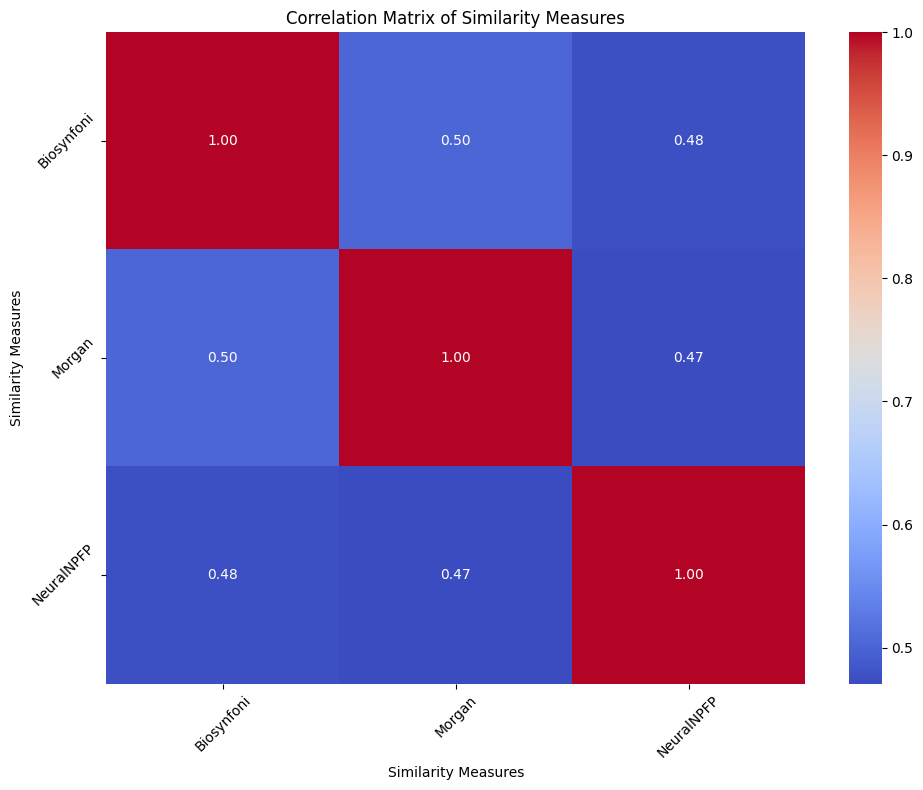

In [91]:
# correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix of Similarity Measures')
plt.xlabel('Similarity Measures')
plt.ylabel('Similarity Measures')
plt.xticks(ticks=np.arange(3) + 0.5, labels=['Biosynfoni', 'Morgan', 'NeuralNPFP'], rotation=45)
plt.yticks(ticks=np.arange(3) + 0.5, labels=['Biosynfoni', 'Morgan', 'NeuralNPFP'], rotation=45)
plt.tight_layout()
plt.show()

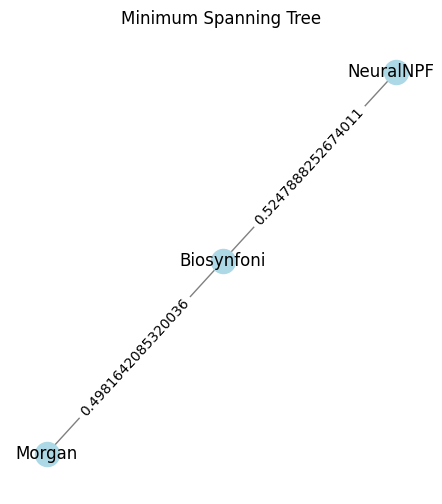

In [94]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt


# Step 2: Convert the Correlation Matrix to a Distance Matrix
distance_matrix = 1 - correlation_matrix

# Create a graph from the distance matrix
G = nx.Graph()
num_nodes = distance_matrix.shape[0]
for i in range(num_nodes):
    for j in range(i + 1, num_nodes):
        G.add_edge(i, j, weight=distance_matrix[i, j])

# Compute the minimum spanning tree without inversion
mst_without_inversion = nx.minimum_spanning_tree(G)

# Invert the distance matrix to get a maximum spanning tree
max_distance = np.max(distance_matrix)
inverted_distance_matrix = max_distance - distance_matrix

# Create a graph from the inverted distance matrix
G_inverted = nx.Graph()
for i in range(num_nodes):
    for j in range(i + 1, num_nodes):
        G_inverted.add_edge(i, j, weight=inverted_distance_matrix[i, j])

# Compute the minimum spanning tree with inversion
mst_with_inversion = nx.minimum_spanning_tree(G_inverted)

# Add labels to the nodes
labels = {0: 'Biosynfoni', 1: 'Morgan', 2: 'NeuralNPFP'}

# Set the labels for the nodes in the graph
for node in mst_without_inversion.nodes():
    if node in labels:
        mst_without_inversion.nodes[node]['label'] = labels[node]
    else:
        mst_without_inversion.nodes[node]['label'] = str(node)

for node in mst_with_inversion.nodes():
    if node in labels:
        mst_with_inversion.nodes[node]['label'] = labels[node]
    else:
        mst_with_inversion.nodes[node]['label'] = str(node)

# Draw the graphs
pos_without = nx.spring_layout(mst_without_inversion)
pos_with = nx.spring_layout(mst_with_inversion)

# Extract node labels
node_labels_without = nx.get_node_attributes(mst_without_inversion, 'label')
node_labels_with = nx.get_node_attributes(mst_with_inversion, 'label')

# Draw the graph without inversion
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
nx.draw(mst_without_inversion, pos_without, with_labels=True, labels=node_labels_without, node_color='lightblue', edge_color='gray')
edge_labels_without = nx.get_edge_attributes(mst_without_inversion, 'weight')
nx.draw_networkx_edge_labels(mst_without_inversion, pos_without, edge_labels=edge_labels_without)
plt.title("Minimum Spanning Tree")

# Draw the graph with inversion

plt.show()


# Atualuzações 16/5

In [ ]:
def fingerprint_pipeline(dataset, fingerprint_type='NPClassifierFP', sample_size=1000, random_state=42):
    from deepmol.compound_featurization import NPClassifierFP, BiosynfoniFingerprint, NeuralNPFingerprint, MHFPFingerprint
    from sklearn.metrics import pairwise_distances
    from scipy.sparse.csgraph import minimum_spanning_tree
    import pandas as pd
    import numpy as np

    if fingerprint_type == 'NPClassifierFP':
        featurizer = NPClassifierFP(n_jobs=-1)
    elif fingerprint_type == 'Biosynfoni':
        featurizer = BiosynfoniFingerprint()
    elif fingerprint_type == 'NeuralNPFP':
        featurizer = NeuralNPFingerprint()
    elif fingerprint_type == 'MHFP':
        featurizer = MHFPFingerprint()
    else:
        raise ValueError("Fingerprint inválido. Use: 'NPClassifierFP', 'Biosynfoni', 'NeuralNPFP' ou 'MHFP'.")

    sampled = dataset.sample(sample_size, random_state=random_state)
    featurizer.featurize(sampled, inplace=True)
    features = sampled.X

    is_binary = np.array_equal(features, features.astype(bool))
    metric = 'jaccard' if is_binary else 'cosine'
    similarity_matrix = 1 - pairwise_distances(features, metric=metric)

    correlation_matrix = pd.DataFrame(np.corrcoef(features.T))
    distance_matrix = 1 - similarity_matrix
    mst = minimum_spanning_tree(distance_matrix).toarray()

    return correlation_matrix, mst


In [ ]:
def fingerprint_pipeline(dataset, fingerprint_type='NPClassifierFP', sample_size=500, random_state=42, plot=False):
    """
    Aplica uma fingerprint molecular a um subconjunto amostrado de um dataset,
    calcula a matriz de similaridade e correlação entre as moléculas e constrói
    a Minimum Spanning Tree com base na similaridade.

    Parâmetros:
    - dataset: objeto  (e.g. SmilesDataset) com moléculas a processar.
    - fingerprint_type: string com o nome da fingerprint a aplicar ('NPClassifierFP', 'Biosynfoni', 'NeuralNPFP', 'MHFP').
    - sample_size: número de moléculas a amostrar aleatoriamente após featurização.
    - random_state: valor inteiro para garantir reprodutibilidade da amostragem.
    - plot: se True, gera visualizações da matriz de correlação e da MST .

    Output:
    - correlation_matrix: matriz de correlação entre features.
    - mst_graph: grafo NetworkX da Minimum Spanning Tree construída a partir das distâncias.
    """

    # Importações 
    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt
    import seaborn as sns
    import networkx as nx
    from tqdm import tqdm
    from deepmol.compound_featurization import (
        NPClassifierFP, BiosynfoniKeys, NeuralNPFP, MHFP
    )

    # Dicionário para seleção da fingerprint
    featurizer_dict = {
        'NPClassifierFP': lambda: NPClassifierFP(n_jobs=-1),
        'Biosynfoni': BiosynfoniKeys,
        'NeuralNPFP': NeuralNPFP,
        'MHFP': MHFP
    }

    # Validação da escolha da fingerprint
    if fingerprint_type not in featurizer_dict:
        raise ValueError(f"Fingerprint inválido. Escolha de: {list(featurizer_dict.keys())}")

    # Aplicar a fingerprint ao dataset
    featurizer = featurizer_dict[fingerprint_type]()
    featurizer.featurize(dataset, inplace=True)

    # Verifica se alguma representação foi gerada
    if dataset.X is None or len(dataset.X) == 0:
        raise ValueError("Nenhuma molécula com fingerprint gerada.")

    # Filtra moléculas que tenham vetor de representação não-nulo
    valid_indices = [i for i, x in enumerate(dataset.X) if x is not None]
    if len(valid_indices) == 0:
        raise ValueError("Nenhuma molécula com vetor não-nulo.")

    # Seleciona apenas as moléculas válidas
    dataset_filtered = dataset.select(valid_indices)

    # Garante que há moléculas suficientes para a amostragem pedida
    if sample_size > len(dataset_filtered):
        raise ValueError(f"sample_size ({sample_size}) > moléculas válidas ({len(dataset_filtered)})")

    # Seleciona aleatoriamente as moléculas a utilizar
    np.random.seed(random_state)
    indices = np.random.choice(len(dataset_filtered), size=sample_size, replace=False)
    sampled = dataset_filtered.select(indices)

    # Obtém a matriz de features e normaliza os vetores 
    features = sampled.X
    norm = np.linalg.norm(features, axis=1, keepdims=True)
    features_norm = features / (norm + 1e-10)

    # Matriz de similaridade 
    similarity_matrix = np.dot(features_norm, features_norm.T)
    np.fill_diagonal(similarity_matrix, 1.0)
    similarity_matrix = np.clip(similarity_matrix, 0, 1)

    # Matriz de correlação entre as features
    correlation_matrix = pd.DataFrame(np.corrcoef(features.T))

    # Construção do grafo de distâncias (1 - similaridade) para gerar a MST
    G = nx.Graph()
    for i in range(sample_size):
        for j in range(i + 1, sample_size):
            dist = 1 - similarity_matrix[i, j]
            G.add_edge(i, j, weight=dist)

    # Criação da árvore mínima de abrangência
    mst_graph = nx.minimum_spanning_tree(G)

    # Gerar  gráficos
    if plot:
        # Heatmap da matriz de correlação
        plt.figure(figsize=(10, 8))
        sns.heatmap(correlation_matrix, cmap='coolwarm', center=0)
        plt.title("Matriz de Correlação")
        plt.show()

        # Visualização da MST
        pos = nx.spring_layout(mst_graph, seed=random_state)
        plt.figure(figsize=(10, 7))
        nx.draw(mst_graph, pos, with_labels=True, node_color='skyblue', edge_color='gray')
        plt.title("Minimum Spanning Tree (NetworkX)")
        plt.show()

    return correlation_matrix, mst_graph


In [ ]:
cor_matrix, mst_graph = fingerprint_pipeline(
    csv_dataset,                     # O dataset carregado com SMILES
    fingerprint_type='NPClassifierFP',  # Ou 'Biosynfoni', 'NeuralNPFP', 'MHFP'
    sample_size=500,                # Número de moléculas a amostrar
    plot=True                       # Ativa o heatmap da correlação e visualização da MST
)


In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

pos = nx.spring_layout(mst_graph, seed=42)
plt.figure(figsize=(10, 7))
nx.draw(mst_graph, pos, with_labels=True, node_color='skyblue', edge_color='gray')
plt.title("Minimum Spanning Tree")
plt.savefig("mst_graph.png", dpi=300)
plt.close()
